In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [19]:
df = pd.read_csv('./data/insurance.csv')

In [20]:
df

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,False,Adult,Prole,Adventurous,Older,Mild,Football,Mild,Economy,...,City,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Many
19996,19997,False,Adult,Middle,Normal,Older,NaN,Tank,NaN,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,False,Thousand,Zero
19997,19998,False,Senior,UpperMiddle,Normal,Current,NaN,Football,NaN,Luxury,...,Secure,True,TenThou,Thousand,False,Thousand,Excellent,True,Thousand,Zero
19998,19999,False,Adult,Middle,Normal,Older,NaN,Football,NaN,FamilySedan,...,Suburb,False,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero


In [21]:
df.shape

(20000, 28)

In [22]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many


**Com os atributos ao redor, queremos prever Accident(variável dependente)**

In [23]:
df = df.dropna()

In [11]:
df.shape

(5319, 27)

In [28]:
df.dtypes

GoodStudent       bool
Age             object
SocioEcon       object
RiskAversion    object
VehicleYear     object
ThisCarDam      object
RuggedAuto      object
Accident        object
MakeModel       object
DrivQuality     object
Mileage         object
Antilock          bool
DrivingSkill    object
SeniorTrain       bool
ThisCarCost     object
Theft             bool
CarValue        object
HomeBase        object
AntiTheft         bool
PropCost        object
OtherCarCost    object
OtherCar          bool
MedCost         object
Cushioning      object
Airbag            bool
ILiCost         object
DrivHist        object
dtype: object

### Selecionado as variáveis

In [24]:
#variável dependente - y
#variáveis independentes - X

y = df.iloc[:,7].values
X = df.iloc[:, [0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]].values

In [25]:
X

array([[False, 'Adult', 'Prole', ..., False, 'Thousand', 'Many'],
       [False, 'Adolescent', 'Prole', ..., False, 'Thousand', 'Many'],
       [False, 'Adult', 'UpperMiddle', ..., True, 'Thousand', 'Many'],
       ...,
       [False, 'Adult', 'Prole', ..., True, 'Thousand', 'Many'],
       [False, 'Adult', 'UpperMiddle', ..., False, 'Thousand', 'Many'],
       [False, 'Adult', 'Prole', ..., False, 'Thousand', 'Many']],
      shape=(5319, 26), dtype=object)

### Transformar os dados

In [26]:
labelencoder = LabelEncoder()

In [30]:
#percorrendo o número de colunas de X
for i in range(X.shape[1]):
    if X[:,i].dtype == 'object':
        X[:,i] = labelencoder.fit_transform(X[:,i]) #transformando tudo em números

In [31]:
X

array([[0, 1, 1, ..., 0, 3, 0],
       [0, 0, 1, ..., 0, 3, 0],
       [0, 1, 2, ..., 1, 3, 0],
       ...,
       [0, 1, 1, ..., 1, 3, 0],
       [0, 1, 2, ..., 0, 3, 0],
       [0, 1, 1, ..., 0, 3, 0]], shape=(5319, 26), dtype=object)

### Treinando o modelo

In [32]:
# X independentes
# y variável independente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #70% treino, 30% teste

In [34]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [35]:
previsions = model.predict(X_test)

In [36]:
previsions

array(['Moderate', 'Moderate', 'Mild', ..., 'Severe', 'Moderate',
       'Moderate'], shape=(1596,), dtype='<U8')

### Performance do modelo através de métricas

In [38]:
accuracy = accuracy_score(y_test, previsions) #previsions é o y de X_test
print(accuracy)

0.5507518796992481


In [43]:
precision = precision_score(y_test, previsions, average='weighted')
print(precision)

0.7895298876518713


In [41]:
recall = recall_score(y_test, previsions, average='weighted')
print(recall)

0.5507518796992481


In [42]:
f1 = f1_score(y_test, previsions, average='weighted')
print(f1)

0.4612364968688107


In [44]:
report = classification_report(y_test, previsions)
print(report)

              precision    recall  f1-score   support

        Mild       0.95      0.87      0.91       423
    Moderate       0.41      0.96      0.57       497
      Severe       0.97      0.05      0.10       676

    accuracy                           0.55      1596
   macro avg       0.78      0.63      0.53      1596
weighted avg       0.79      0.55      0.46      1596



In [48]:
confusion_matrix = ConfusionMatrix(model, classes=['None', 'Severe', 'Mild', 'Moderate'])

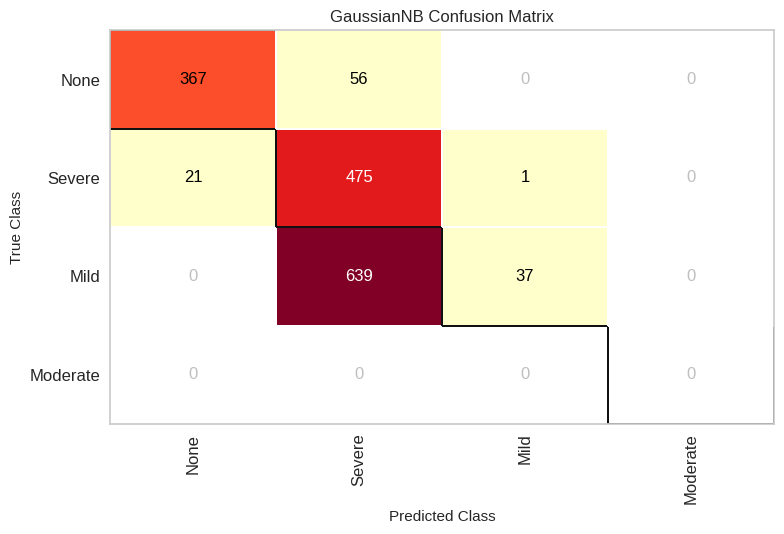

In [49]:
confusion_matrix.fit(X_train, y_train)
confusion_matrix.score(X_test, y_test)
confusion_matrix.poof();